Anime Data Analysis from MyAnimeList (MAL)

In [1]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load data frame
#from https://www.kaggle.com/aludosan/myanimelist-anime-dataset-as-20190204/downloads/myanimelist-anime-dataset-as-20190204.zip/1
animeDF = pd.read_csv('anime_data.csv')

In [3]:
#shape of data frame
animeDF.shape

(15278, 27)

In [4]:
animeDF.head(3)

,animeID,name,title_english,title_japanese,title_synonyms,type,source,producers,genre,studio,...,scored_by,rank,popularity,members,favorites,synopsis,background,premiered,broadcast,related
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,[],TV,Original,['Bandai Visual'],"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",['Sunrise'],...,405664.0,26.0,39.0,795733.0,43460.0,"In the year 2071, humanity has colonized sever...",When Cowboy Bebop first aired in spring of 199...,Spring 1998,Saturdays at 01:00 (JST),"{'Adaptation': [{'mal_id': 173, 'type': 'manga..."
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,"[""Cowboy Bebop: Knockin' on Heaven's Door""]",Movie,Original,"['Sunrise', 'Bandai Visual']","['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']",['Bones'],...,120243.0,164.0,449.0,197791.0,776.0,"Another day, another bounty—such is the life o...",NaN,NaN,NaN,"{'Parent story': [{'mal_id': 1, 'type': 'anime..."
2,6,Trigun,Trigun,トライガン,[],TV,Manga,['Victor Entertainment'],"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...",['Madhouse'],...,212537.0,255.0,146.0,408548.0,10432.0,"Vash the Stampede is the man with a $$60,000,0...",The Japanese release by Victor Entertainment h...,Spring 1998,Thursdays at 01:15 (JST),"{'Adaptation': [{'mal_id': 703, 'type': 'manga..."


In [5]:
animeDF.tail(3)

,animeID,name,title_english,title_japanese,title_synonyms,type,source,producers,genre,studio,...,scored_by,rank,popularity,members,favorites,synopsis,background,premiered,broadcast,related
15275,39197,Karrimor Mountain Club,Karrimor Mountain Club,Karrimor Mountain Club,[],ONA,Original,[],"['Adventure', 'Slice of Life']",[],...,0.0,11624.0,15424.0,10.0,0.0,A series of animated commercials produced by K...,NaN,NaN,NaN,{}
15276,39198,Kanata no Astra,NaN,彼方のアストラ,['Astra Lost in Space'],TV,Manga,[],"['Action', 'Sci-Fi', 'Shounen', 'Space']",['Lerche'],...,0.0,0.0,0.0,0.0,2.0,"The year is 2061, when space travel is now pos...",NaN,NaN,Unknown,"{'Adaptation': [{'mal_id': 98578, 'type': 'man..."
15277,39199,Katsute Kami Datta Kemono-tachi e,NaN,かつて神だった獣たちへ,['To the Abandoned Sacred Beasts'],TV,Manga,[],"['Fantasy', 'Shounen']",['MAPPA'],...,0.0,0.0,0.0,9.0,1.0,"During the Civil War, the North—desperate to d...",NaN,NaN,Unknown,"{'Adaptation': [{'mal_id': 72117, 'type': 'man..."


Data Analysis of Anime Studios

In [6]:
def parse_list_text(text): 
    remove = ['\'', '[', ']', '\"']
    word_list = text.split(',')
    for i in range(len(word_list)) :
        for re in remove :
            word_list[i] = word_list[i].replace(re, '')
            word_list[i] = word_list[i].strip()
    word_list = [word for word in word_list if len(word) != 0] #remove empty string
    return word_list

In [7]:
#find n most occurrence
def find_max(dct):
    m = list(dct.keys())[0]
    max_val = 0
    for elem in dct:
        if dct[elem] > dct[m]:
            m = elem
            max_val = dct[elem]
    return m
    
    
def find_n_max(dct, n):
    rslt = {}
    dct_copy = dct.copy()
    cap = np.infty
    for i in range(n):
        m = find_max(dct_copy)
        rslt[m] = dct_copy[m]
        cap = dct_copy[m]
        dct_copy.pop(m)
    return rslt

In [8]:
#find which studio produce the most number of anime
animeStudio = animeDF.loc[:, ' studio']
animeStudio = animeStudio.fillna('')
count = {}
for list_text in animeStudio:
    lst = parse_list_text(list_text)
    for word in lst:
        if word in count :
            count[word] += 1
        else :
            count[word] = 1
find_n_max(count, 10) 

{'Toei Animation': 740,
 'Sunrise': 467,
 'Madhouse': 344,
 'J.C.Staff': 341,
 'Production I.G': 312,
 'TMS Entertainment': 281,
 'Studio Deen': 266,
 'Studio Pierrot': 253,
 'OLM': 212,
 'Nippon Animation': 207}

(array([531.,  12.,   6.,   3.,   3.,   0.,   1.,   0.,   0.,   1.]),
 array([  1. ,  74.9, 148.8, 222.7, 296.6, 370.5, 444.4, 518.3, 592.2,
        666.1, 740. ]),
 <a list of 10 Patch objects>)

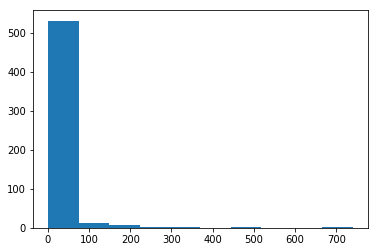

In [9]:
plt.hist([elem for elem in count.values() if elem > 0])

In [10]:
animeScore = animeDF.loc[:, ' score']
animeMember = animeDF.loc[:, ' members']

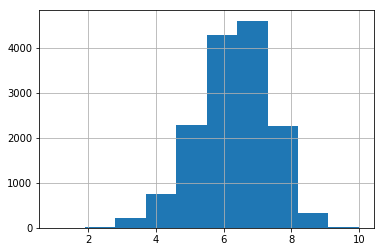

In [11]:
animeScore.hist()

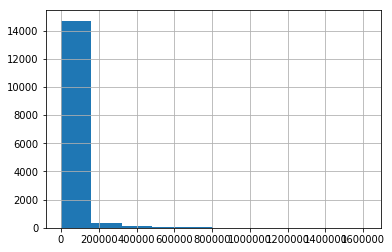

In [12]:
animeMember.hist()

In [13]:
score_thres= animeScore.quantile(0.8)
member_thres = animeMember.quantile(0.8)
print(score_thres)
print(member_thres)

7.210000000000001
17279.2


In [14]:
def is_good_anime(i):
    return animeMember[i] > member_thres and animeScore[i] > score_thres

In [15]:
#find studios with highest 'good' anime count
good_count = {}
for i, list_text in enumerate(animeStudio):
    if is_good_anime(i):  
        lst = parse_list_text(list_text)
        for word in lst:
            if word in good_count :
                good_count[word] += 1
            else :
                good_count[word] = 1
find_n_max(good_count, 10)

{'Production I.G': 112,
 'Madhouse': 105,
 'Sunrise': 103,
 'J.C.Staff': 103,
 'Toei Animation': 97,
 'A-1 Pictures': 92,
 'Studio Deen': 90,
 'Bones': 67,
 'Kyoto Animation': 63,
 'Studio Pierrot': 59}

(array([139.,  16.,   5.,   3.,   2.,   3.,   0.,   0.,   3.,   4.]),
 array([  1. ,  12.1,  23.2,  34.3,  45.4,  56.5,  67.6,  78.7,  89.8,
        100.9, 112. ]),
 <a list of 10 Patch objects>)

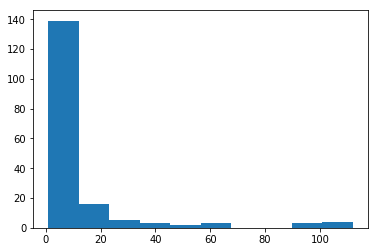

In [16]:
plt.hist([elem for elem in good_count.values() if elem > 0])

In [17]:
mean_anime_per_studio = animeDF.shape[0] / len(count)
mean_anime_per_studio

27.429084380610412

In [18]:
good_ratio = {}
for m in count:
    if m in good_count and count[m] > mean_anime_per_studio/10:
        good_ratio[m] = good_count[m]/count[m] * 100
    else:
        good_ratio[m] = 0
find_n_max(good_ratio, 10) 

{'Studio Chizu': 100.0,
 'Animation Do': 100.0,
 'Studio Rikka': 85.71428571428571,
 'Shuka': 80.0,
 'David Production': 67.85714285714286,
 'Studio VOLN': 57.14285714285714,
 'Bones': 55.833333333333336,
 'AIC Build': 55.55555555555556,
 'Lerche': 54.166666666666664,
 'Kyoto Animation': 53.38983050847458}

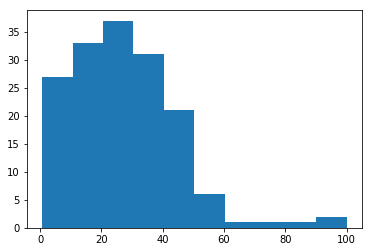

In [19]:
plt.hist([elem for elem in good_ratio.values() if elem > 0])
plt.show()